Вручную выкачиваю отзывы на женские романы с IRecommend (+-30 для отзывов с 1 звездой и для отзывов с 5 звездами). Позитивные - в одном файле, негативные - в другом.

In [64]:
with open('positive_text.txt', encoding='utf-8') as f:
    positive_text = f.read()

In [142]:
with open('negative_text.txt', encoding='utf-8') as f:
    negative_text = f.read()

Привожу к нижнему регистру, токенизирую

In [143]:
import nltk
from nltk.corpus import *
from nltk.tokenize import word_tokenize

nomorph_positive_words = [w.lower() for w in word_tokenize(positive_text) if w.isalpha()]
nomorph_negative_words = [w.lower() for w in word_tokenize(negative_text) if w.isalpha()]

Привожу к начальной форме

In [138]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

positive_words = []
negative_words = []

for token in nomorph_positive_words:
    parsed = morph.parse(token)
    first = parsed[0]
    positive_words.append(first.normal_form)
        
for token in nomorph_negative_words:
    parsed = morph.parse(token)
    first = parsed[0]
    negative_words.append(first.normal_form)

Нахожу множество слов, которые присутствуют только в одном из списков 
(всё кроме пересечения)

In [151]:
XOR = list(set(positive_words) ^ set(negative_words))
ult_good = []
ult_bad = []
for word in positive_words:
    if word in XOR:
        ult_good.append(word)
        
for word in negative_words:
    if word in XOR:
        ult_bad.append(word)

In [152]:
with open('random_review.txt', encoding='utf-8') as f:
    review = f.read()

Функция, которая приводит отзыв к нормальному виду - токены, нижный регистр, нач. форма

In [153]:
def comb(review):
    combed_review = []
    tok_review = [w.lower() for w in word_tokenize(review) if w.isalpha()]
    for token in tok_review:
        parsed = morph.parse(token)
        first = parsed[0]
        combed_review.append(first.normal_form)
    return combed_review

Функция, которая определяет, каких слов больше - позитивных или негативных, и на основе этого предполагает общее настроение текста

In [154]:
def attitude(review):
    good = []
    bad = []
    for word in review:
        if word in ult_good:
            good.append(word)
        if word in ult_bad:
            bad.append(word)
    if len(good) > len(bad):
        print("Позитивный отзыв")
    else:
        print("Негативный отзыв")

In [156]:
attitude(comb(review))

Позитивный отзыв


##### Что можно добавить?

Кажется, что лучше смотреть по n-граммам, чем по отдельным токенам: банально, но в негативных отзывах часто встречаются конструкции с отрицанием вроде "не рекомендую", "не вызывает восхищения", "без интереса" и т.д., где отрицание примыкает к позитивно окрашенным словам, которые без отрицания в отзыве не встречаются. А еще есть совсем сложные вещи вроде "воодушевление быстро испарилось" или "напрасные опасения".

Еще я подумала, что было бы интересно попробовать обратить внимание на капс, - кажется, это может помочь, если мы пытаемся определить общее настроение текста. (Учитывая, что чаще всего выделяют именно слова, так или иначе содержащие эмоциональную оценку) Проблема в том, что для этого придется писать чуть ли не отдельный код, а еще есть много отзывов без капса вообще или - чаще - с одним-двумя выделенными словами, то есть, не очень понятно, может ли это помочь получить какую-то значимую информацию на практике...

И на всякий случай:

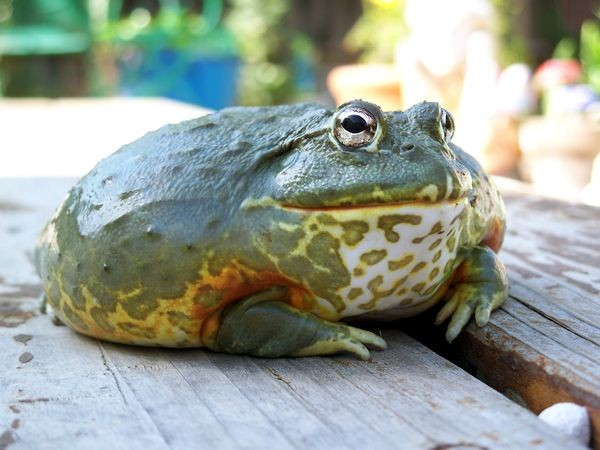

In [102]:
from IPython.core.display import Image, display
display(Image('https://sun1-98.userapi.com/cA0jJ0ht9-wqCSodcOoYvrEAOd4xWoETlCPDJw/RenXlGRESLM.jpg', width=600, unconfined=True))